In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

In [57]:
data = pd.read_csv('data/diabetes_na.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50.0,1
1,NaN,85,66,29.0,0,26.6,0.351,NaN,0
2,8.0,183,64,0.0,0,NaN,0.672,32.0,1
3,1.0,89,66,23.0,94,28.1,0.167,21.0,0
4,0.0,137,40,35.0,168,43.1,2.288,33.0,1


In [58]:
data.isna().sum()

Pregnancies                 2
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     0
BMI                         1
DiabetesPedigreeFunction    0
Age                         1
Outcome                     0
dtype: int64

In [59]:
df = data.fillna(method='bfill')
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values

In [ ]:
# spliting train and Test dataset
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=2)

In [61]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(xtrain,ytrain)
log_pred = log_reg.predict(xtest)
log_pred

C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [97]:
len(log_pred)

192

In [62]:
# performance Measures

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print("Accuracy Score \t",accuracy_score(ytest,log_pred))
print("Confusion Matrix \t",confusion_matrix(ytest,log_pred))
print("classification Report \t", classification_report(ytest,log_pred))

Accuracy Score 	 0.7604166666666666
Confusion Matrix 	 [[121  13]
 [ 33  25]]
classification Report 	               precision    recall  f1-score   support

           0       0.79      0.90      0.84       134
           1       0.66      0.43      0.52        58

    accuracy                           0.76       192
   macro avg       0.72      0.67      0.68       192
weighted avg       0.75      0.76      0.74       192



In [63]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [69]:
# ROC Curve
# finding the probabilties of all samples.

log_prob=log_reg.predict_proba(xtest)[:,1]

In [70]:
log_prob

array([0.08866522, 0.20435858, 0.11851859, 0.20294092, 0.45907642,
       0.17105769, 0.11084799, 0.42839368, 0.10476779, 0.54997449,
       0.4138107 , 0.46049792, 0.7054914 , 0.20449237, 0.05026097,
       0.78688753, 0.79831468, 0.07028641, 0.33818831, 0.80800738,
       0.91464034, 0.79013158, 0.17503598, 0.32744759, 0.14755621,
       0.11410799, 0.54291248, 0.37265134, 0.19656906, 0.31019846,
       0.24430981, 0.43058578, 0.06675678, 0.27557248, 0.40641509,
       0.9200716 , 0.35746867, 0.75684716, 0.31756236, 0.11258514,
       0.25101752, 0.1009352 , 0.58546362, 0.22503329, 0.05905463,
       0.08312015, 0.27409398, 0.43344043, 0.12994607, 0.44022003,
       0.96313272, 0.09594847, 0.32136478, 0.73733006, 0.37600542,
       0.47334514, 0.88165521, 0.38264966, 0.2580877 , 0.09171063,
       0.40420982, 0.81081807, 0.79040269, 0.8408945 , 0.32465101,
       0.11975108, 0.9366833 , 0.3496819 , 0.32312925, 0.34307948,
       0.14510841, 0.11635831, 0.47319775, 0.12563098, 0.13923

In [71]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

# calculate ROC & AUC

fpr,tpr,thresholds = roc_curve(ytest,log_prob)
roc_curve =auc(fpr,tpr)

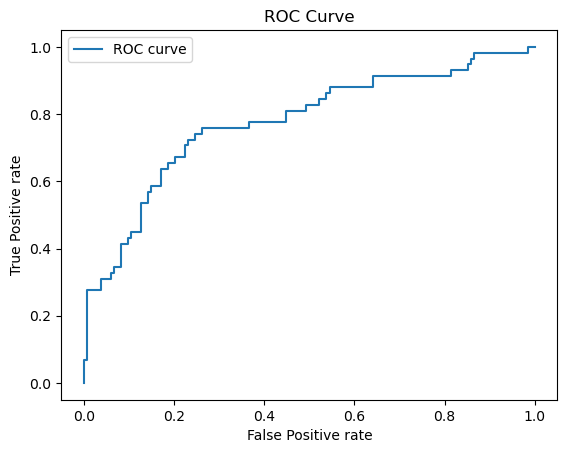

In [72]:
plt.plot(fpr,tpr,label='ROC curve')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [73]:
roc_curve

0.7759907359752959

In [76]:
Confusion_Matrix = confusion_matrix(ytest,log_pred)
Confusion_Matrix

array([[121,  13],
       [ 33,  25]], dtype=int64)

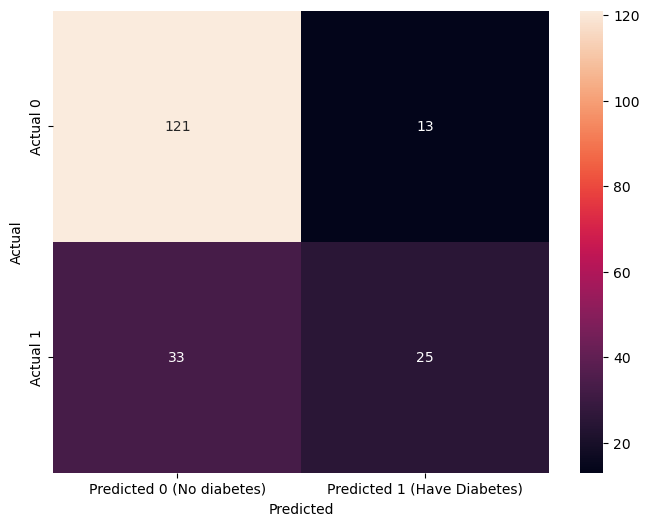

In [83]:
plt.figure(figsize=(8, 6))
sns.heatmap(Confusion_Matrix, annot=True, fmt='d', xticklabels=['Predicted 0 (No diabetes)', 'Predicted 1 (Have Diabetes)'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [84]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Upsampling

In [109]:
# Upsampling

# Separate the majority and minority classes
from sklearn.utils import resample

majority_class = df[df['Outcome'] == 0]
minority_class = df[df['Outcome'] == 1]

# Upsample the minority class to match the number of samples in the majority class
upsampled_minority = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=2)

# Combine the upsampled minority class with the majority class
upsampled_data = pd.concat([majority_class, upsampled_minority])

In [110]:
upsampled_data['Outcome'].value_counts()

0    500
1    500
Name: Outcome, dtype: int64

In [111]:
upsampled_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,8.0,85,66,29.0,0,26.6,0.351,32.0,0
3,1.0,89,66,23.0,94,28.1,0.167,21.0,0
5,5.0,116,74,0.0,0,25.6,0.201,30.0,0
7,10.0,115,0,0.0,0,35.3,0.134,29.0,0
10,4.0,110,92,0.0,0,37.6,0.191,30.0,0
...,...,...,...,...,...,...,...,...,...
603,7.0,150,78,29.0,126,35.2,0.692,54.0,1
130,4.0,173,70,14.0,168,29.7,0.361,33.0,1
19,1.0,115,70,30.0,96,34.6,0.529,32.0,1
115,4.0,146,92,0.0,0,31.2,0.539,61.0,1


In [112]:
upsa_x = upsampled_data.iloc[:,:-1].values
upsa_y = upsampled_data.iloc[:,-1:].values

In [113]:
# spliting train and Test dataset
xtrain,xtest,ytrain,ytest = train_test_split(upsa_x,upsa_y,test_size=0.25,random_state=2)

In [114]:
ytest.shape

(250, 1)

In [115]:
upsample_log_reg = LogisticRegression(solver='liblinear')
upsample_log_reg.fit(xtrain,ytrain)
upsample_log_pred = upsample_log_reg.predict(xtest)
upsample_log_pred

C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [116]:
len(upsample_log_pred)

250

In [117]:
print("Accuracy Score: \t",accuracy_score(ytest,upsample_log_pred))
print()
print("Confusion Matrix: \n",confusion_matrix(ytest,upsample_log_pred))
print()
print("classification Report :\n", classification_report(ytest,upsample_log_pred))

Accuracy Score: 	 0.764

Confusion Matrix: 
 [[ 89  32]
 [ 27 102]]

classification Report :
               precision    recall  f1-score   support

           0       0.77      0.74      0.75       121
           1       0.76      0.79      0.78       129

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250



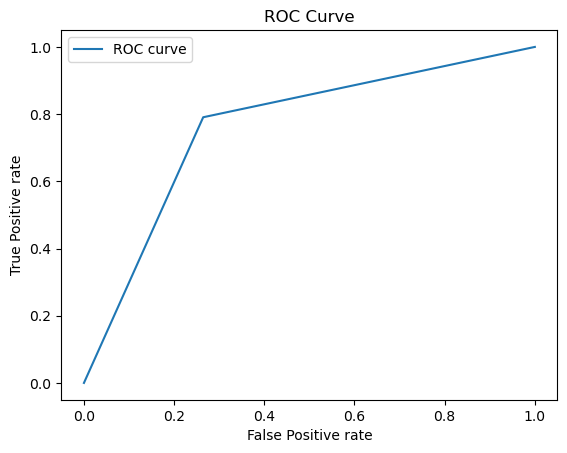

In [118]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

# calculate ROC & AUC
fpr,tpr,thresholds = roc_curve(ytest,upsample_log_pred)
roc_curve =auc(fpr,tpr)

plt.plot(fpr,tpr,label='ROC curve')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

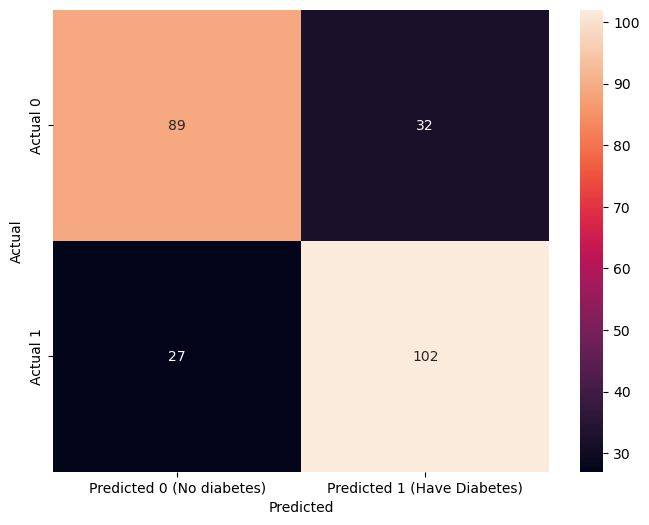

In [119]:
Confusion_Matrix = confusion_matrix(ytest,upsample_log_pred)
Confusion_Matrix

plt.figure(figsize=(8, 6))
sns.heatmap(Confusion_Matrix, annot=True, fmt='d', xticklabels=['Predicted 0 (No diabetes)', 'Predicted 1 (Have Diabetes)'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Downsampling

In [120]:
# Downsample the majority class to match the number of samples in the minority class
downsampled_majority = majority_class.sample(n=len(minority_class), random_state=2)

# Combine the downsampled majority class with the minority class
downsampled_data = pd.concat([downsampled_majority, minority_class])

In [121]:
downsampled_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
204,6.0,103,72,32.0,190,37.7,0.324,55.0,0
453,2.0,119,0,0.0,0,19.6,0.832,72.0,0
671,1.0,99,58,10.0,0,25.4,0.551,21.0,0
587,6.0,103,66,0.0,0,24.3,0.249,29.0,0
365,5.0,99,54,28.0,83,34.0,0.499,30.0,0
...,...,...,...,...,...,...,...,...,...
755,1.0,128,88,39.0,110,36.5,1.057,37.0,1
757,0.0,123,72,0.0,0,36.3,0.258,52.0,1
759,6.0,190,92,0.0,0,35.5,0.278,66.0,1
761,9.0,170,74,31.0,0,44.0,0.403,43.0,1


In [122]:
downsa_x = downsampled_data.iloc[:,:-1].values
downsa_y = downsampled_data.iloc[:,-1:].values

In [126]:
# spliting train and Test dataset
xtrain,xtest,ytrain,ytest = train_test_split(downsa_x,downsa_y,test_size=0.25,random_state=2)

In [129]:
xtrain.shape

(402, 8)

In [130]:
downsample_log_reg = LogisticRegression(solver='liblinear')
downsample_log_reg.fit(xtrain,ytrain)
downsample_log_pred = downsample_log_reg.predict(xtest)
downsample_log_pred

C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1], dtype=int64)

In [131]:
len(downsample_log_pred)

134

In [132]:
print("Accuracy Score: \t",accuracy_score(ytest,downsample_log_pred))
print()
print("Confusion Matrix: \n",confusion_matrix(ytest,downsample_log_pred))
print()
print("classification Report :\n", classification_report(ytest,downsample_log_pred))

Accuracy Score: 	 0.7761194029850746

Confusion Matrix: 
 [[54 17]
 [13 50]]

classification Report :
               precision    recall  f1-score   support

           0       0.81      0.76      0.78        71
           1       0.75      0.79      0.77        63

    accuracy                           0.78       134
   macro avg       0.78      0.78      0.78       134
weighted avg       0.78      0.78      0.78       134



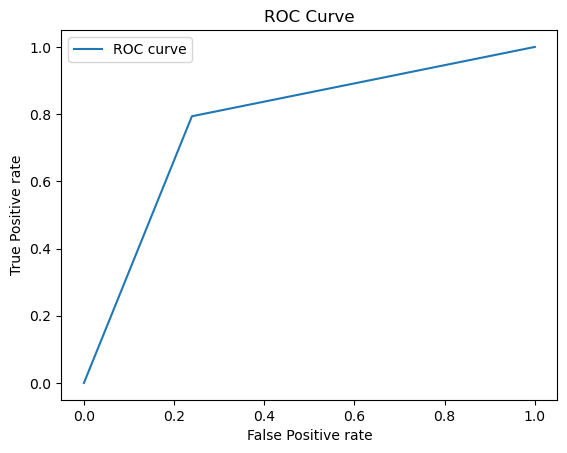

In [133]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

# calculate ROC & AUC
fpr,tpr,thresholds = roc_curve(ytest,downsample_log_pred)
roc_curve =auc(fpr,tpr)

plt.plot(fpr,tpr,label='ROC curve')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

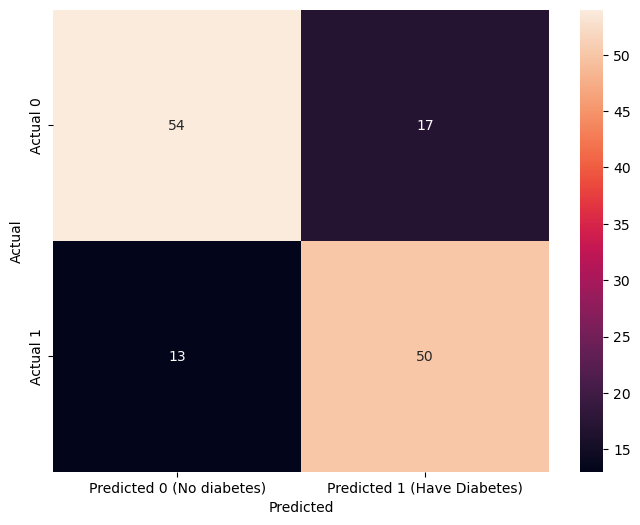

In [134]:
Confusion_Matrix = confusion_matrix(ytest,downsample_log_pred)
Confusion_Matrix

plt.figure(figsize=(8, 6))
sns.heatmap(Confusion_Matrix, annot=True, fmt='d', xticklabels=['Predicted 0 (No diabetes)', 'Predicted 1 (Have Diabetes)'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## ----------------------------------------------- Analysis Report -------------------------------------------------------
After performing three models of logistic regression classification, Downsampling approach yields 
the highest accuracy score, while the normal dataset and the upsampled dataset have similar accuracy..